In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv(r'2022-23_data_sa_crime.csv')

# Convert 'Reported Date' to datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d/%m/%Y')
df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,"Other fraud, deception and related offences",1
1,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Graffiti,1
2,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2
3,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,Other unlawful entry with intent,1
4,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2
...,...,...,...,...,...,...,...
97073,2023-06-30,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1
97074,2023-06-30,WOODVILLE SOUTH,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1
97075,2023-06-30,WYNN VALE,5127,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1
97076,2023-06-30,NaN,NaN,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1


### Were there any particular times of the year that we saw incidents?

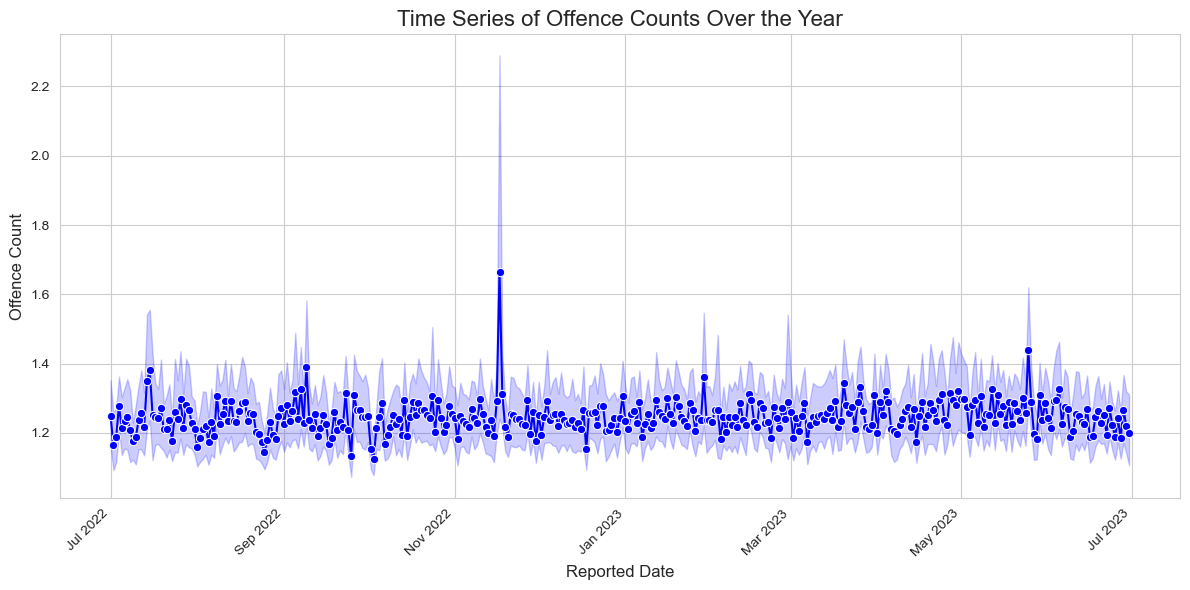

In [3]:
# Plotting using Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Use lineplot to create a time series plot
sns.lineplot(x='Reported Date', y='Offence count', data=df, marker='o', color='b')

plt.title('Time Series of Offence Counts Over the Year', fontsize=16)
plt.xlabel('Reported Date', fontsize=12)
plt.ylabel('Offence Count', fontsize=12)

# Set x-axis ticks to show only month and year
date_form = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

The trend seems to be relatively normal over the course of 2 years. It's interesting though to see a spike in December of 2022. Let's investigate!

### Were there any particular suburbs that experience the sudden increase in December of 2022?

In [8]:
df.groupby('Reported Date')['Offence count'].count().sort_values(ascending=False)

Reported Date
2023-02-06    344
2023-02-27    341
2023-05-22    337
2022-09-19    334
2022-12-12    331
             ... 
2022-07-17    199
2022-12-26    198
2022-07-10    193
2022-07-16    190
2022-12-25    170
Name: Offence count, Length: 365, dtype: int64

In [6]:
df.groupby('Suburb - Incident')['Offence count'].sum().sort_values(ascending=False)

Suburb - Incident
ADELAIDE         7907
NOT DISCLOSED    2509
PORT AUGUSTA     2445
PORT LINCOLN     1890
MORPHETT VALE    1668
                 ... 
GUM CREEK           1
ROWLAND FLAT        1
HALLET COVE         1
HARCOURT            1
MERGHINY            1
Name: Offence count, Length: 1330, dtype: int64

### Were there any particular times of the year that we saw incidents?

### Major Trends in Types of Incidents?